# Instructions
1. Click "Restart and run all" from the kernel menu to run the notebook.

2. When you see a drop down menu, you can select individual states or multiple states.  Then run the next cell by 

3. Then run the next cell by selecting it with your mouse and either clicking the "run button" above or pressing "Shift + Enter" on your keyboard.

In [1]:
from aux_files_data_exploration import *

# Question 1: How have people changed their behavior in response to information about the COVID19?

To address this question, I used data from the Google Community Mobility reports in which they used location data from phone activity to compare activity levels to baselines periods from before the pandemic was announced.  They describe the data as follows: 

"These datasets show how visits and length of stay at different places change compared to a baseline. We calculate these changes using the same kind of aggregated and anonymized data used to show popular times for places in Google Maps.

Changes for each day are compared to a baseline value for that day of the week:

The baseline is the median value, for the corresponding day of the week, during the 5-week period Jan 3–Feb 6, 2020."

Google LLC "Google COVID-19 Community Mobility Reports."
https://www.google.com/covid19/mobility/ Accessed: 4/19/2020.
    
I then plotted the changes over time and overlayed the timing of three important events: 
* The WHO declaration that COVID-19 had become a pandemic (March 11).
* Statewide school closures (varies from state to state)
* Statewide stay at home orders (varies from state to state)

The results are displayed below.  These plots suggest that most states experienced an increase in residential activity of around 20%, decreases of in grocery and pharmacy activity of around 20% and drops in transit, workplace and retail and recreation activity between 30% and 60%.  These drops followed the WHO declaration of a pandemic and largely preceded stay-at-home orders. In some cases, these changes may have been accelerated by school closures, but there is little evidence that stay-at-home orders had a significant effect on mobility patterns.  

To plot the results for a particular state, select the state from the dropdown below (make sure you executed the cell by pressing the run button or shift+Enter first).

In [2]:
select_mobility=make_widgets_mobility()

Now execute the cell below to plot all of the states you want to see. Note: This uses a moving average of the last n days.  Set n=1 to view the raw (unsmoothed data).

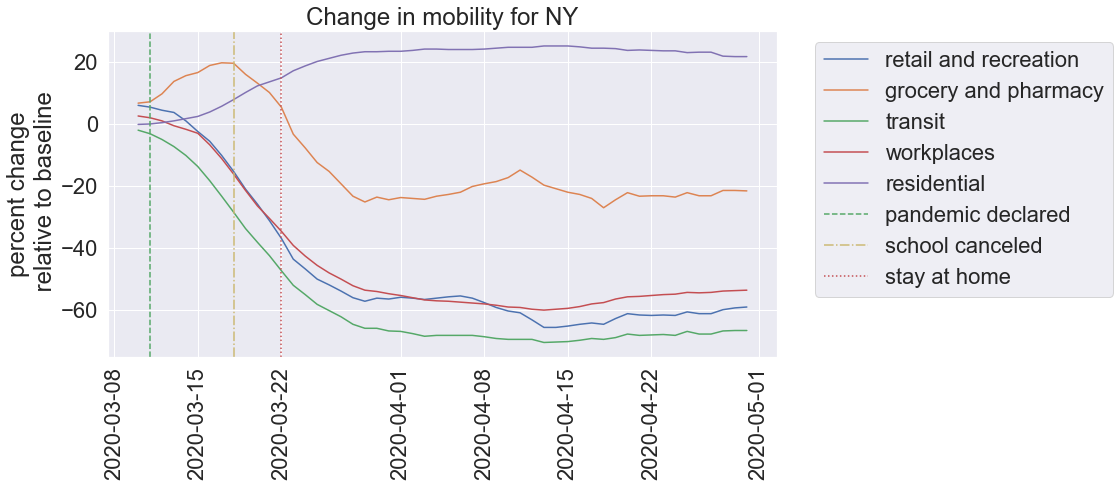

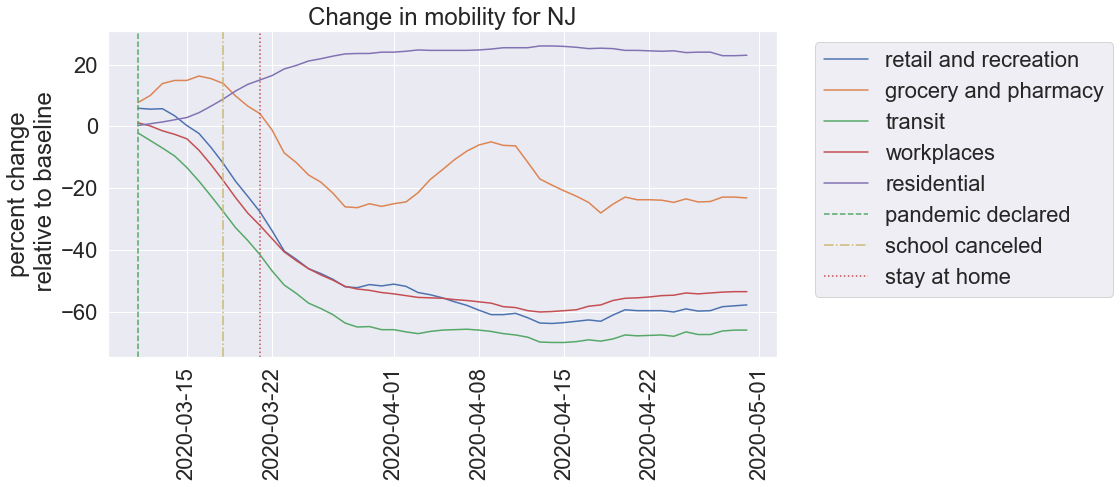

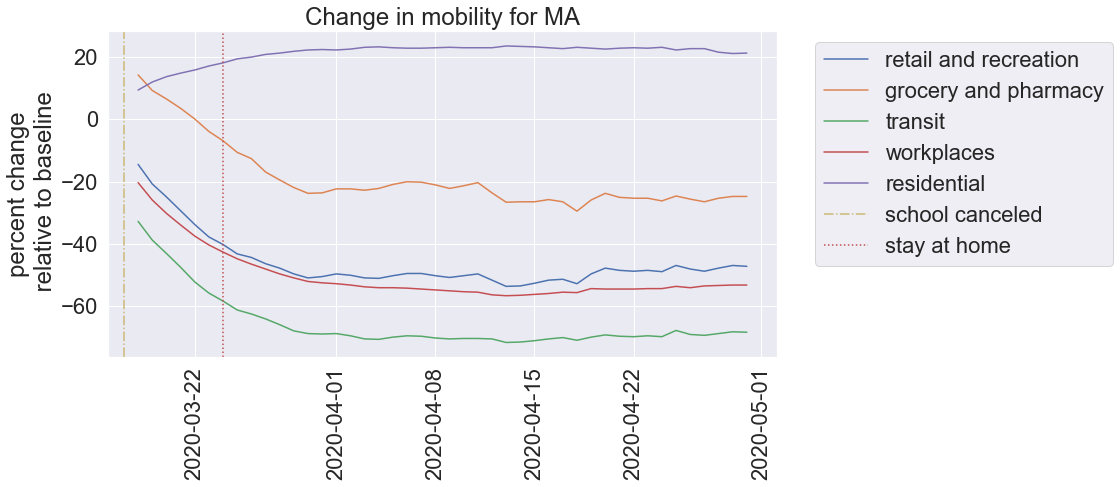

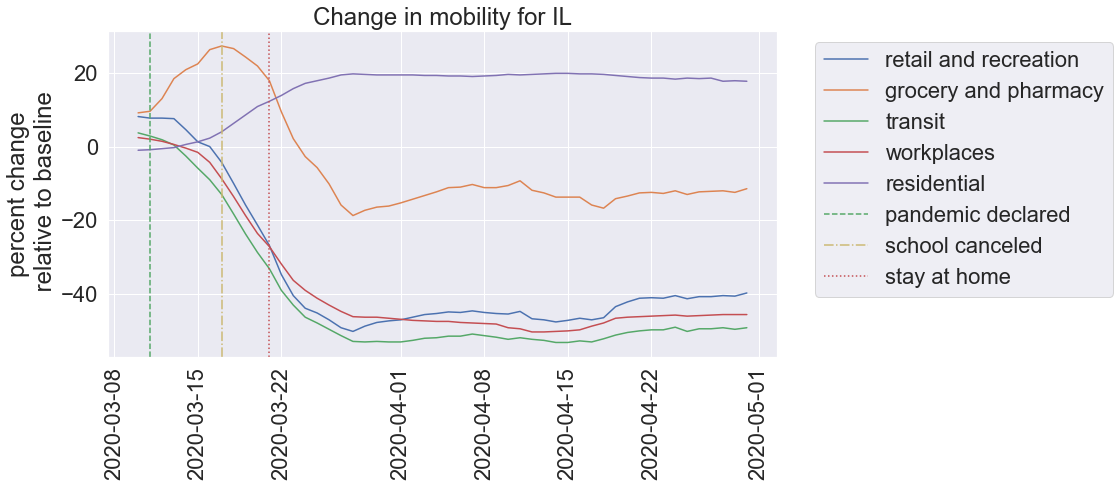

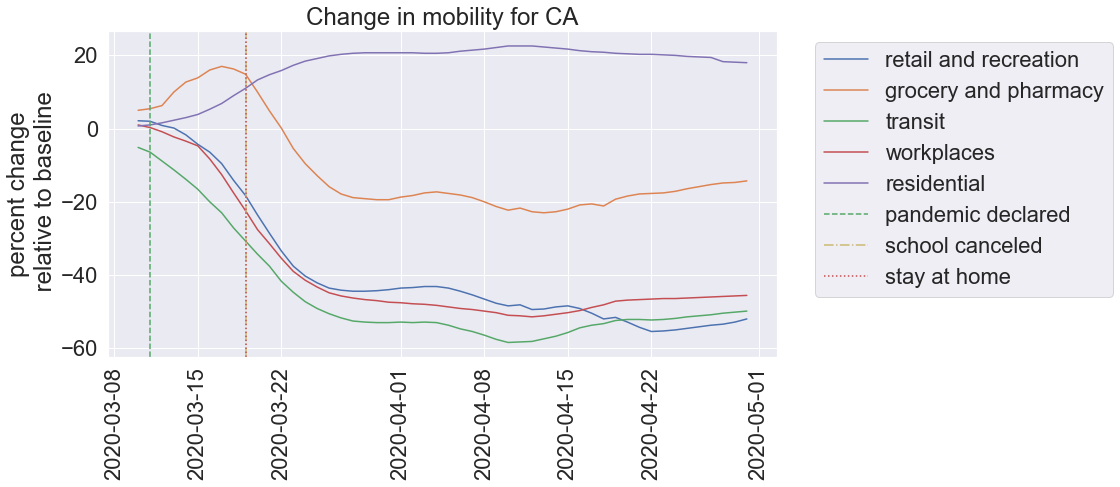

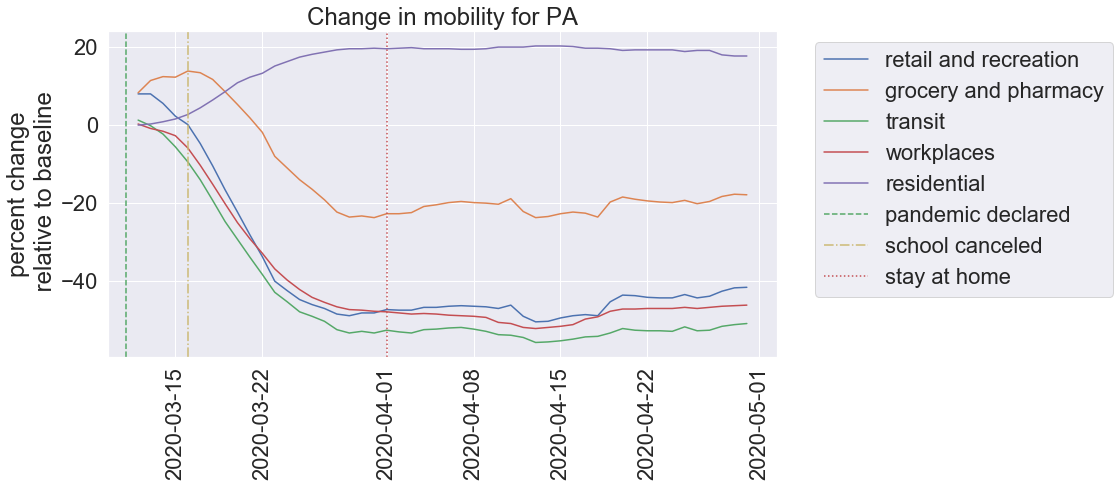

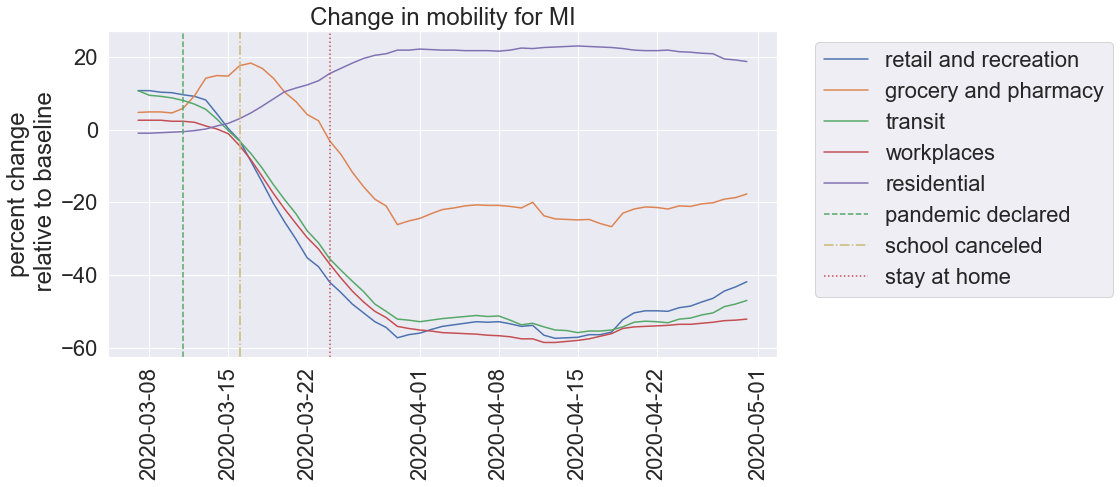

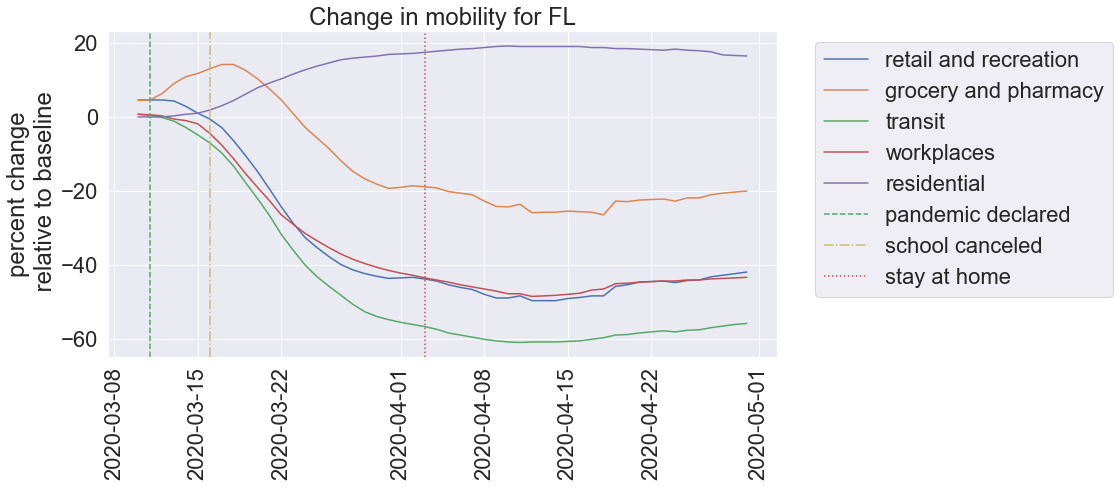

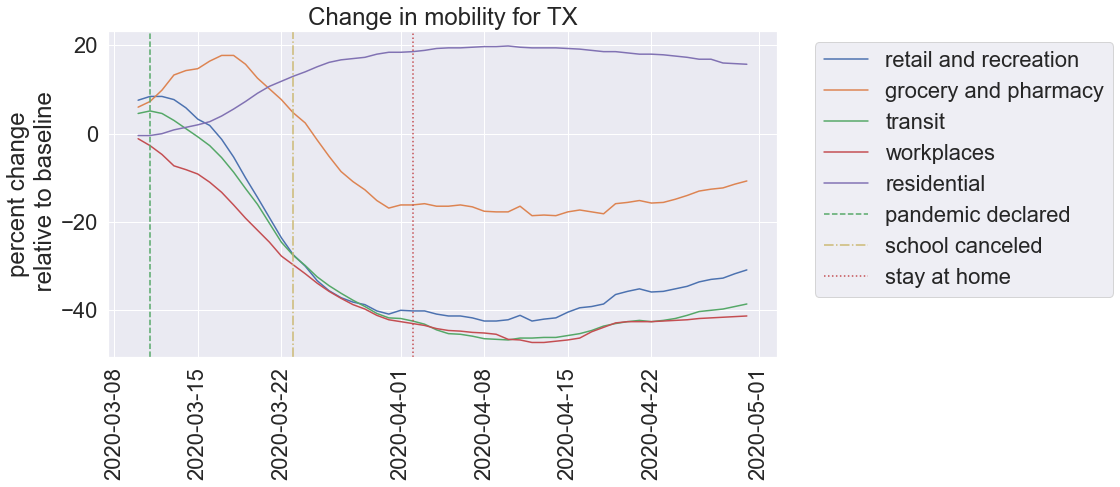

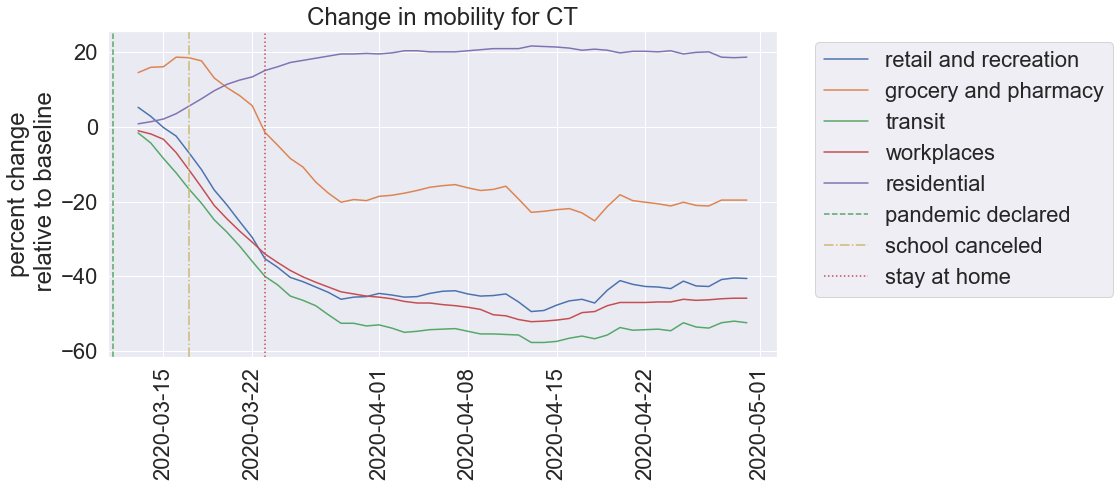

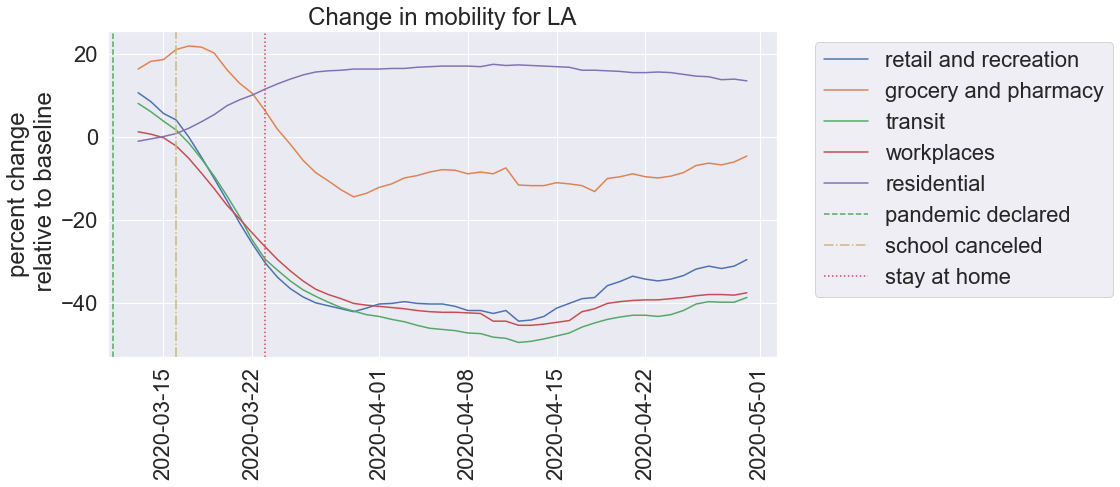

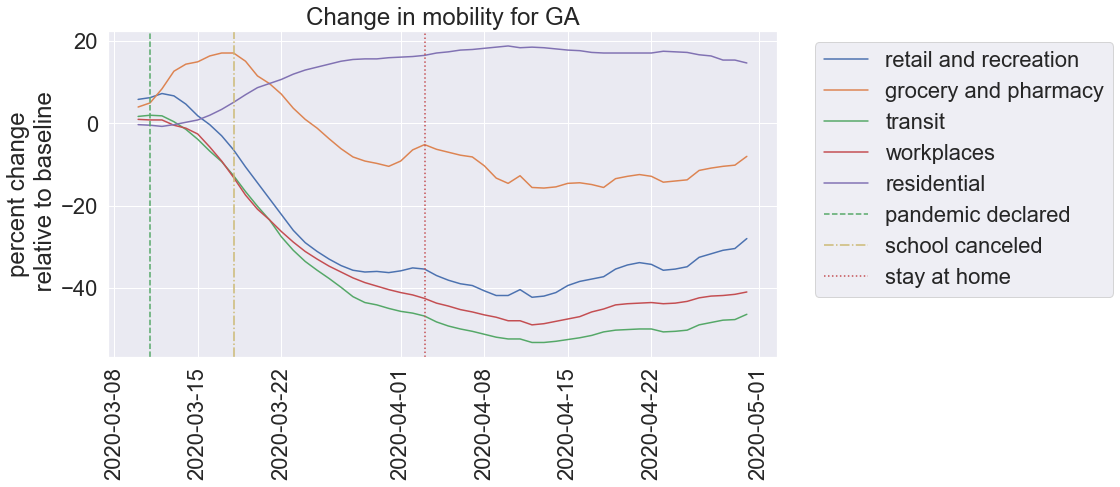

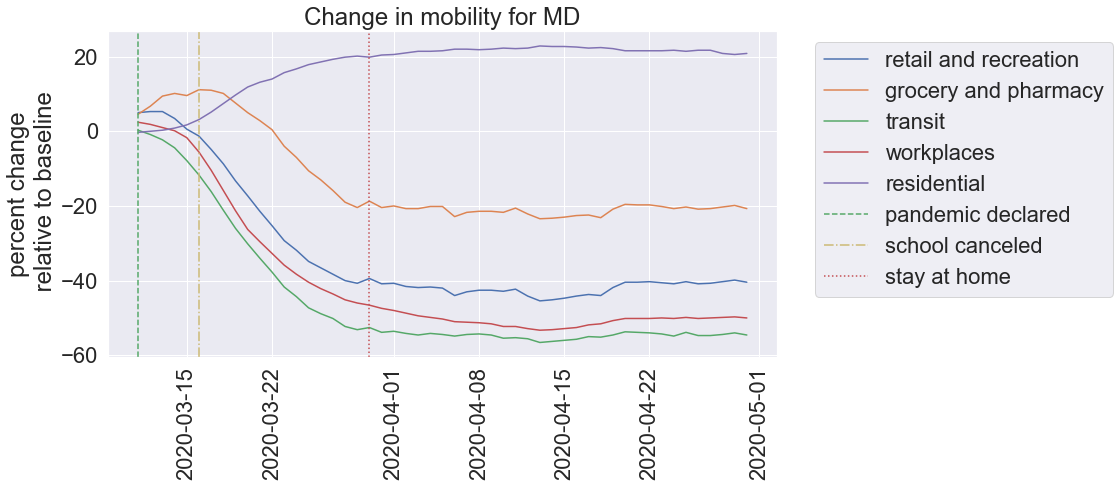

In [16]:
n=7
for state in [states_by_infected[k] for k in select_mobility.children[1].index]:
    plot_mobility(state,aligned=False,mvavg=n)

# Question 2: How has our testing capability changed since the start of the pandemic? 

An ability to test suspected COVID-19 cases is a vital part of controlling the spread of the virus.  Since symptoms are not a reliable way to determine whether a person is contagious, it is important that people who have been exposed be tested in order to determine whether quarantining is necessary.  In the early stages of the outbreak, tests were scarce.  

Below we assess the extent to which our testing capacity has increased over time.  We do this by fitting a logistic curve to the daily number of tests administered.  Logistic curves are widely used to model the adoption of technology and provide an excellent fit for this data. The horizontal asymptote for this curve provides an estimate for the maximum testing capacity. 

We find that this capacity grew exponentiall initially, but has since leveled off at around 150000 tests per day (about 0.04% of the US population).  This is concerning because researchers estimate that we will need over three times that capacity to be able to effectively control the epidemic (https://www.nytimes.com/interactive/2020/04/17/us/coronavirus-testing-states.html)

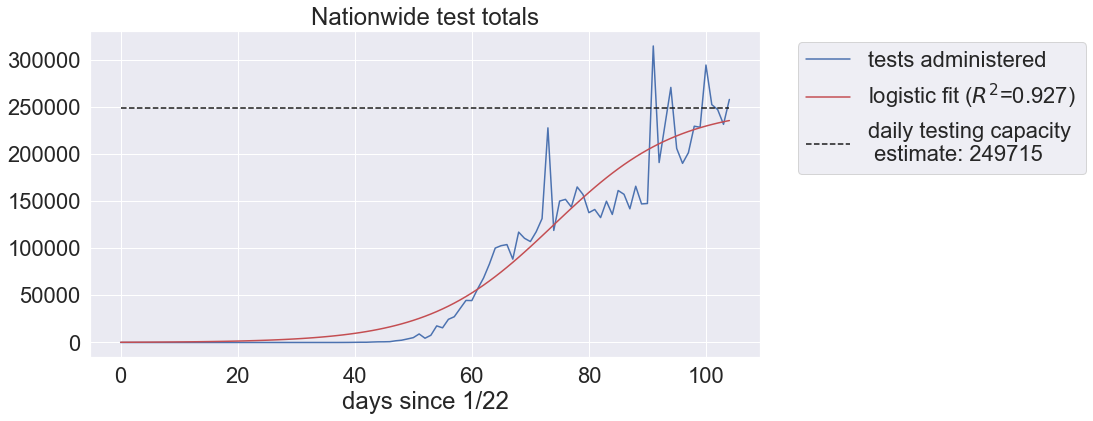

In [5]:
fit_and_plot_test_results()

The results for individual states can be plotted by running the code below.

In [13]:
select,mov_avg=make_widgets_testing()

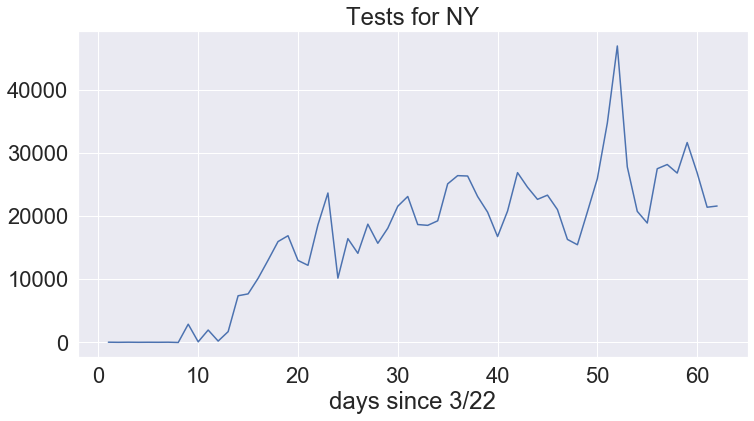

In [14]:
n=mov_avg.children[1].value
for state in [states_by_infected[k] for k in select.children[1].index]:
    plot_test_results(state,n)

# Question 3: How should the limited availability of testing affect the way that we interpret the number of confirmed cases? 

Due to the limited availability of tests and the fact that many cases seem to be mild with few if any symptoms, there is a great deal of uncertainty around how many people actually have the virus.  Most data sources report the number of confirmed cases based on positive test results. However, this data underestimates the number of cases and cannot be used to estimate the prevalance of the virus in the broader population.  

Looking at nationwide data we see that the percentage of tests that came back positive was close to 100% initially. However it quickly dropped below 25% reaching lows aof around 10% before rising to close to 20%. What could cause this?

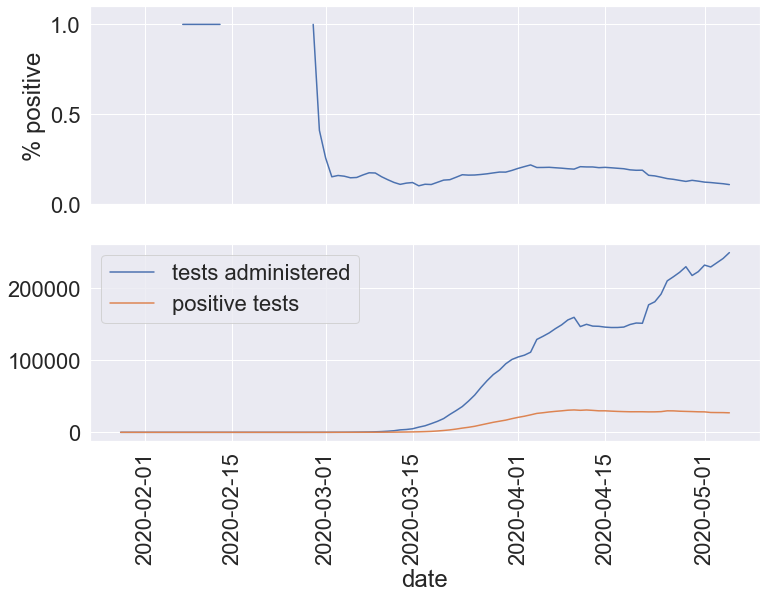

In [10]:
plot_positive_rate(window=7)

One explanation is that only severe (almost certainly positive) cases were tested initially due to the scarcity of tests. As tests became more available, less severe cases were tested and more and more negative test results were observed. However, as the pandemic spread, the number of infected people grew faster than the testing capacity so more and more of those less severe cases that got tested were positive, so the observed positive rate increased again. Exploring this further is on my to-do list.


In the mean time, plots for individual states can be generated using the code below.

In [9]:
select,mov_avg=make_widgets_testing()

In [ ]:
n=mov_avg.children[1].value
for state in [states_by_infected[k] for k in select.children[1].index]:
    plot_positive_rate_by_state(state,window=n)